###  Définir le Projet

    Objectif : Développer un modèle de machine learning capable de détecter les fake news à partir de textes d'articles.
    Livrables : Rapport final, code source, modèle entraîné, et éventuellement une interface utilisateur pour tester le modèle.

### Download data

lien vers la dataset : https://github.com/KaiDMML/FakeNewsNet/

In [1]:
import pandas as pd

In [2]:
data_real= pd.read_csv(r"C:\Users\Adminetu\Downloads\politifact_real.csv")

In [3]:
data_real.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [4]:
data_real.columns

Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')

In [5]:
data_fake = pd.read_csv(r"C:\Users\Adminetu\Downloads\politifact_fake.csv")

In [6]:
data_fake.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [7]:
data_fake['label'] = 1
data_real['label'] = 0

In [8]:
data_fake.head(3)

,id,news_url,title,tweet_ids,label
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,1
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,1
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,1


In [9]:
combined_data= pd.concat([data_fake, data_real])

In [10]:
#mélanger les lignes des datasets
combined_data= combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
combined_data.head(5)

,id,news_url,title,tweet_ids,label
0,politifact14885,www.breakingnews247.net/59bc13819a723/world-s-...,World's most popular candy to be removed from ...,908193166632812545\t908318679821160450\t908327...,1
1,politifact1106,http://frwebgate.access.gpo.gov/cgi-bin/getdoc...,Browse Congressional Bills,2761266599\t3283658037\t3439787429\t5180526172...,0
2,politifact1678,http://abcnews.go.com/ThisWeek/video/supreme-c...,Supreme Court Vacancy Video,NaN,0
3,politifact370,http://tonto.eia.doe.gov/dnav/pet/pet_move_wkl...,U.S. Imports & Exports,735229171086065664\t735591660080488449\t736678...,0
4,politifact15263,http://sciencevibe.com/2018/04/11/dying-78-yea...,Dying 78 Year Old CIA Agent Admits To Killing ...,588772842071666688\t588795790774140929\t588796...,1


### supprimer les colonnes qui ne vont pas servir dans la suite

In [12]:
#droped_columns = [col for col in combined_data.columns if col not in ['title', 'label']]

In [13]:
droped_columns = ['id','news_url','tweet_ids']

In [14]:
combined_data = combined_data.drop(columns=droped_columns)

In [15]:
combined_data.head(5)

,title,label
0,World's most popular candy to be removed from ...,1
1,Browse Congressional Bills,0
2,Supreme Court Vacancy Video,0
3,U.S. Imports & Exports,0
4,Dying 78 Year Old CIA Agent Admits To Killing ...,1


In [16]:
combined_data.label.value_counts()

label
0    624
1    432
Name: count, dtype: int64

<Axes: title={'center': 'title_lenght'}, xlabel='label'>

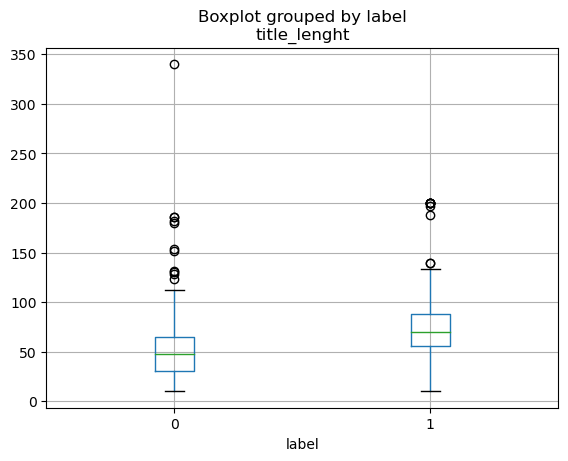

In [17]:
combined_data['title_lenght']= combined_data['title'].apply(len)
combined_data.boxplot(column='title_lenght', by='label')

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
fake_titles = ' '.join(combined_data[combined_data['label'] == 0]['title'])
real_titles = ' '.join(combined_data[combined_data['label'] == 1]['title'])

fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_titles)

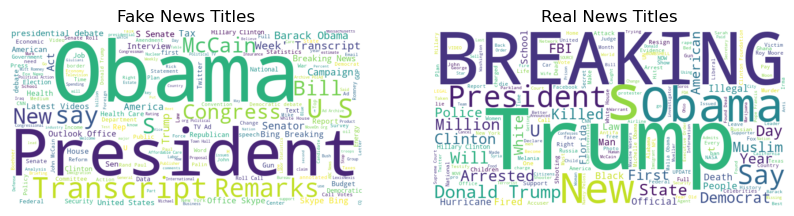

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Titles')
plt.axis('off')

plt.show()

## Prétraitement des données

In [21]:
import re
from nltk.corpus import stopwords

In [22]:
stop_words = set(stopwords.words('english'))

In [24]:
def process_text(text):
    text= text.lower()
    text= re.sub(r'\d+','', text) #remove digits
    text= re.sub(r'[^\w\s]','', text)# remove ponctuation
    text=' '.join([word for word in text.split() if word not in stop_words])
    return text

In [25]:
combined_data['clean_title'] = combined_data['title'].apply(process_text)

## feature engineering

### TF-IDF Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(combined_data['clean_title'])
Y= combined_data['label']

### séparation des données en text_entrainement

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## entrainement et evaluation des modèles

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score 

In [34]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Logistic regression')
print(classification_report(y_test, y_pred_lr))
print('accuracy score', accuracy_score(y_test, y_pred_lr))

Logistic regression
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       125
           1       0.84      0.41      0.55        87

    accuracy                           0.73       212
   macro avg       0.77      0.68      0.68       212
weighted avg       0.76      0.73      0.70       212

accuracy score 0.7264150943396226


In [37]:
#naive bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print('naive bayes')
print(classification_report(y_test, y_pred_nb))
print('accuracy score', accuracy_score(y_test, y_pred_nb))

naive bayes
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       125
           1       0.87      0.54      0.67        87

    accuracy                           0.78       212
   macro avg       0.81      0.74      0.75       212
weighted avg       0.80      0.78      0.77       212

accuracy score 0.7783018867924528


In [38]:
#support vector machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print('support vector machine')
print(classification_report(y_test, y_pred_svm))
print('accuracy score', accuracy_score(y_test, y_pred_svm))

support vector machine
              precision    recall  f1-score   support

           0       0.73      0.94      0.83       125
           1       0.86      0.51      0.64        87

    accuracy                           0.76       212
   macro avg       0.80      0.72      0.73       212
weighted avg       0.79      0.76      0.75       212

accuracy score 0.7641509433962265


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
y_pred_grid = grid.predict(X_test)
print('Grid Search SVM')
print(classification_report(y_test, y_pred_grid))
print('Accuracy:', accuracy_score(y_test, y_pred_grid))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................